In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
hm=pd.read_csv("/content/sample_data/haberman.csv",header=None,names =['age','year_of_treatment',
                                                                'positive _lymph_nodes','survival_5yr'])

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [ ]:
hm.shape  # checking shape of dataset.

(306, 4)

In [ ]:
hm.rename(columns={'year_of_treatment':'yot','positive _lymph_nodes':'pln','survival_5yr':'s5r'},inplace=True)

using rename function rename the long charcter in short length for futur use using dictinory

In [ ]:
hm.head() #checking 1st five value of dataset

,age,yot,pln,s5r
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
hm.isnull().sum()  # checking null value in data set.

age    0
yot    0
pln    0
s5r    0
dtype: int64

In [ ]:
hm.info() #checking th datatype of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   yot     306 non-null    int64
 2   pln     306 non-null    int64
 3   s5r     306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


age - It represents age of patient at the time of operation(numerical)

year_of_treatment (yot)- It represents year of operation(numerical)

positive_lymph_nodes(pln) - It tells no of +ve auxillry node detected(numerical)

survival_5yr(s5y) - Survival status 1 = the patient survived 5 years or longer 2 = 

the patient died within 5 year

In [ ]:
hm['s5r'].value_counts()  # find usin value count funtion thate which patient survived 5 year or more then 2 year

1    225
2     81
Name: s5r, dtype: int64

In [ ]:
for i in hm:
  print(i,':', len(hm[i].value_counts())) # to find the unique value with value counts function

age : 49
yot : 12
pln : 31
s5r : 2


In [ ]:
b=(['age','yot','pln','s5r'])
len(hm[b].value_counts())

289

In [ ]:
# Lets try to find no of unique value in each column

col = hm.columns
for i in col:
    print(i,"=", len(hm[i].value_counts()))
# Comparitevely less unique values in year_of_treatment 
# it will be intresting to see what impact it is having on target variable

age = 49
yot = 12
pln = 31
s5r = 2


Objective

Our objective is to decide whether based on the data we have, if we can classify the patients will survive or not

In [ ]:
hm.describe()

,age,yot,pln,s5r
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
hm['s5r'].replace(to_replace=1,value='yes',inplace=True)
hm['s5r'].replace(to_replace=2,value='no',inplace=True)
hm['s5r'].value_counts()

yes    225
no      81
Name: s5r, dtype: int64

In [ ]:
hm.head()

,age,yot,pln,s5r
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [ ]:
hm.tail()

,age,yot,pln,s5r
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no
305,83,58,2,no


#coming to the visualization part

#UNIVARIENT ANALIYSIS

yes    225
no      81
Name: s5r, dtype: int64

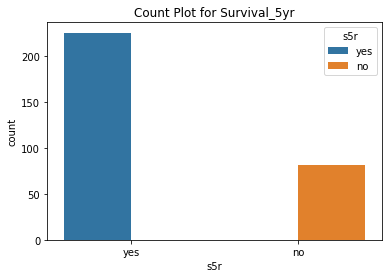

In [ ]:
sns.countplot(x='s5r',data=hm,hue='s5r').set_title('Count Plot for Survival_5yr')
hm['s5r'].value_counts()

In [ ]:
sns.FacetGrid(hm,hue='s5r',height=6).map(sns.distplot,'age').add_legend().set_axis_labels('age','density')
plt.title('distribution plot for age', y=1.05,fontsize=12)
plt.show()

# looking at visualization by using age 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

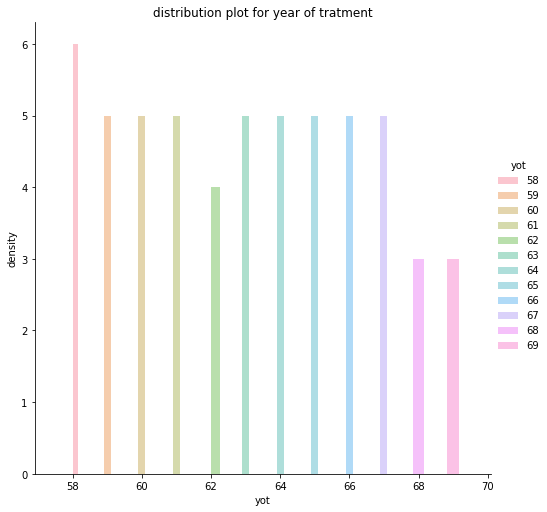

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: yot, dtype: int64

In [ ]:
sns.FacetGrid(hm,hue='yot',height=7).map(sns.distplot,'yot').add_legend().set_axis_labels('yot','density')
plt.title('distribution plot for year of tratment')
plt.show()
hm.yot.value_counts()

BI-VARIENT ANALYSIS

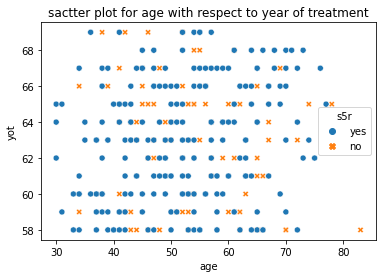

In [55]:
sns.scatterplot(data=hm,x='age',y='yot',hue='s5r',style='s5r')
plt.title('sactter plot for age with respect to year of treatment')
plt.show()

#sactter plot for age with respect to year of treatment

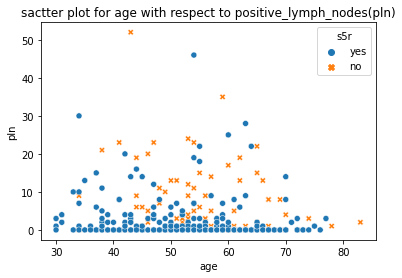

In [57]:
sns.scatterplot(data=hm,x='age',y='pln',hue='s5r',style='s5r')
plt.title('sactter plot for age with respect to positive_lymph_nodes(pln)')
plt.show()

using multivarivarient analysis

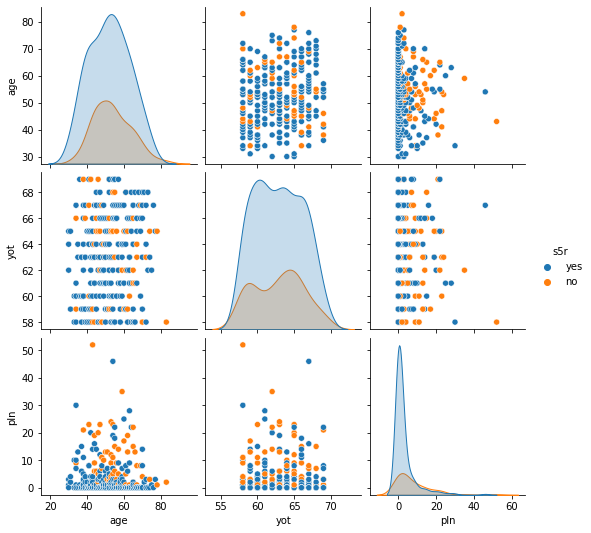

In [60]:
sns.pairplot(data=hm,hue='s5r')
plt.show()

draw box plot for futhur understading

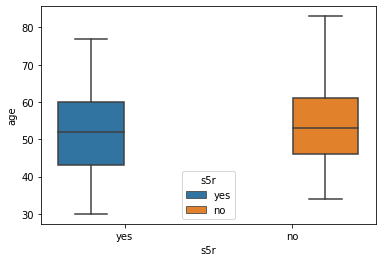

In [63]:
sns.boxplot(data=hm,x='s5r',y='age',hue='s5r')


Text(0.5, 1.0, 'box plot pln with respect to ytn')

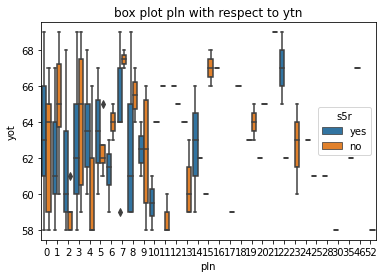

In [65]:
sns.boxplot(data=hm,x='pln',y='yot',hue='s5r')
plt.title('box plot pln with respect to ytn')

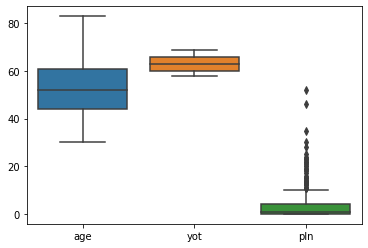

In [66]:
sns.boxplot(data=hm)
# there are outlier at pln how to deal we watch in next proceeses
# dealim=ng with outliers